Problem Statement:Gross domestic product (GDP) at current prices is the GDP at the market value of goods and services produced in a country during a year. In other words, GDP measures the 'monetary value of final goods and services produced by a country/state in a given period of time'.
 - Calculate the average growth of states over the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'.
 - Analyze and compare GDP's of various Indian States(Both Total and Per CApita).
 - Categorise the states into four categories based on GDP per capita. For each of these categories find top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc which contribute to approx. 80% of the GSDP of each category
 - Identify the top-5 and the bottom-5 states based on GDP per capita.
 - Find the ratio of highest per capita GDP to the lowest per capita GDP.
 - Which states have been growing consistently fast, and which ones have been struggling?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("State-wise Gross Domestic Product (GDP) at current price on yearly basis.csv")

In [2]:
df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [3]:
df.shape

(11, 36)

#### Considering only 2013-14, 2014-15 and 2015-16 rows for '(% Growth over previous year)' as per the ask.

In [4]:
df=df.drop(df.index[0:6])
duration = ['2013-14','2014-15','2015-16']
df = df[df['Duration'].isin(duration)]
df=df[df.Duration.isin(duration)]
# Column West Bengal1'is having 100% NAN values and also drop irrelevant rows.
df=df.drop(['West Bengal1','Items  Description','All_India GDP'],axis = 1)
df

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.35,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,9.72,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,9.39,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15


#### Handling Missing Values

In [5]:
round(100*(df.isnull().sum()/len(df)),2)

Duration                      0.00
Andhra Pradesh                0.00
Arunachal Pradesh             0.00
Assam                         0.00
Bihar                         0.00
Chhattisgarh                  0.00
Goa                           0.00
Gujarat                       0.00
Haryana                       0.00
Himachal Pradesh             33.33
Jammu & Kashmir               0.00
Jharkhand                     0.00
Karnataka                     0.00
Kerala                        0.00
Madhya Pradesh                0.00
Maharashtra                  33.33
Manipur                      33.33
Meghalaya                     0.00
Mizoram                      33.33
Nagaland                     33.33
Odisha                        0.00
Punjab                       33.33
Rajasthan                    33.33
Sikkim                        0.00
Tamil Nadu                    0.00
Telangana                     0.00
Tripura                      33.33
Uttar Pradesh                 0.00
Uttarakhand         

In [6]:
cols = list(df.columns[df.isnull().any()])
cols

['Himachal Pradesh',
 'Maharashtra',
 'Manipur',
 'Mizoram',
 'Nagaland',
 'Punjab',
 'Rajasthan',
 'Tripura',
 'Andaman & Nicobar Islands']

#### Replacing the Missing values with median values of coresponding columns since values are not uniformly distributed.

In [7]:
for i in cols:
    df.loc[np.isnan(df[i]),[i]] = df[i].median()

In [8]:
round(100*(df.isnull().sum()/len(df)),2)

Duration                     0.0
Andhra Pradesh               0.0
Arunachal Pradesh            0.0
Assam                        0.0
Bihar                        0.0
Chhattisgarh                 0.0
Goa                          0.0
Gujarat                      0.0
Haryana                      0.0
Himachal Pradesh             0.0
Jammu & Kashmir              0.0
Jharkhand                    0.0
Karnataka                    0.0
Kerala                       0.0
Madhya Pradesh               0.0
Maharashtra                  0.0
Manipur                      0.0
Meghalaya                    0.0
Mizoram                      0.0
Nagaland                     0.0
Odisha                       0.0
Punjab                       0.0
Rajasthan                    0.0
Sikkim                       0.0
Tamil Nadu                   0.0
Telangana                    0.0
Tripura                      0.0
Uttar Pradesh                0.0
Uttarakhand                  0.0
Andaman & Nicobar Islands    0.0
Chandigarh

In [9]:
df.rename(columns={'Duration':'States'}, inplace=True)
df.set_index(['States'],inplace=True)
df = df.T
df

States,2013-14,2014-15,2015-16
Andhra Pradesh,12.85,13.40,15.850
Arunachal Pradesh,16.38,14.79,12.070
Assam,13.31,11.45,13.190
Bihar,12.30,17.92,10.590
Chhattisgarh,16.44,13.69,10.980
Goa,-5.77,13.12,10.750
Gujarat,11.47,10.82,11.090
Haryana,15.45,9.18,10.910
Himachal Pradesh,14.42,10.14,12.280
Jammu & Kashmir,10.09,4.70,17.910


In [10]:
# Finding the avergae of all three years for all states.
df['Average'] = df.mean(axis=1)
df

States,2013-14,2014-15,2015-16,Average
Andhra Pradesh,12.85,13.40,15.850,14.033333
Arunachal Pradesh,16.38,14.79,12.070,14.413333
Assam,13.31,11.45,13.190,12.650000
Bihar,12.30,17.92,10.590,13.603333
Chhattisgarh,16.44,13.69,10.980,13.703333
Goa,-5.77,13.12,10.750,6.033333
Gujarat,11.47,10.82,11.090,11.126667
Haryana,15.45,9.18,10.910,11.846667
Himachal Pradesh,14.42,10.14,12.280,12.280000
Jammu & Kashmir,10.09,4.70,17.910,10.900000


#### Top and Bottm 5 states are as below:

In [11]:
# Sort the Dataframe on Average Desceding
df = df.sort_values(by=['Average'],ascending=False)
print(df.head(5))
print(df.tail(5))

States             2013-14  2014-15  2015-16    Average
Mizoram              23.10    12.30   17.700  17.700000
Tripura              18.14    15.92   17.030  17.030000
Nagaland             21.98    10.85   16.415  16.415000
Manipur              17.83    11.39   14.610  14.610000
Arunachal Pradesh    16.38    14.79   12.070  14.413333
States           2013-14  2014-15  2015-16    Average
Jammu & Kashmir    10.09     4.70    17.91  10.900000
Sikkim             12.35     9.72     9.39  10.486667
Odisha             12.95    10.37     6.19   9.836667
Meghalaya           4.87     6.41     9.58   6.953333
Goa                -5.77    13.12    10.75   6.033333


#### Plot the 1st graph comparing average growth of states over the duration 2013-14, 2014-15 and 2015-16

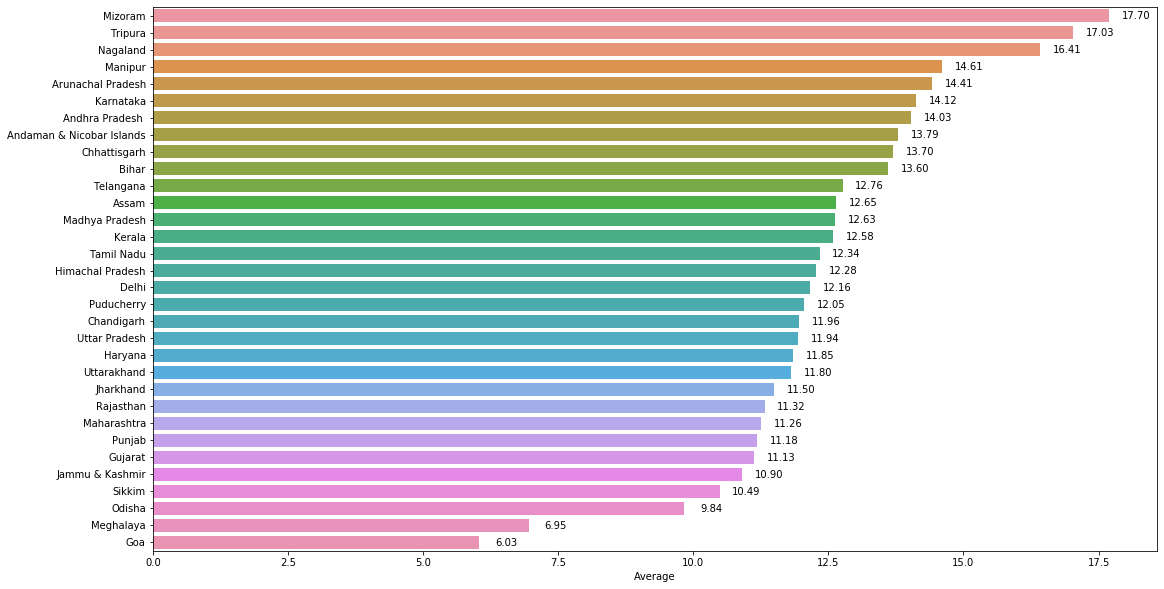

In [12]:
# Plot the 1st graph comparing average growth of states over the duration 2013-14, 2014-15 and 2015-16
plt.figure(figsize=(18,10))
ax = sns.barplot(data=df,y=df.index,x='Average')
for p in ax.patches:
    width = p.get_width()
    plt.text(0.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [13]:
df=df.T
dfk = pd.DataFrame(df["Karnataka"])
dfk = dfk.T
df=df.T
dfk['Overall_Average'] = df['Average'].mean()
dfk

States,2013-14,2014-15,2015-16,Average,Overall_Average
Karnataka,18.24,12.7,11.42,14.12,12.406823


#### Plot the Second graph showing states growing consistently fast and states which ones have been struggling.

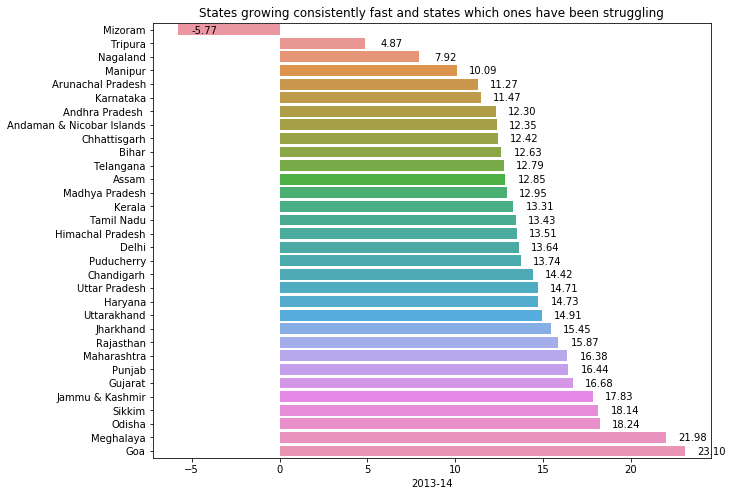

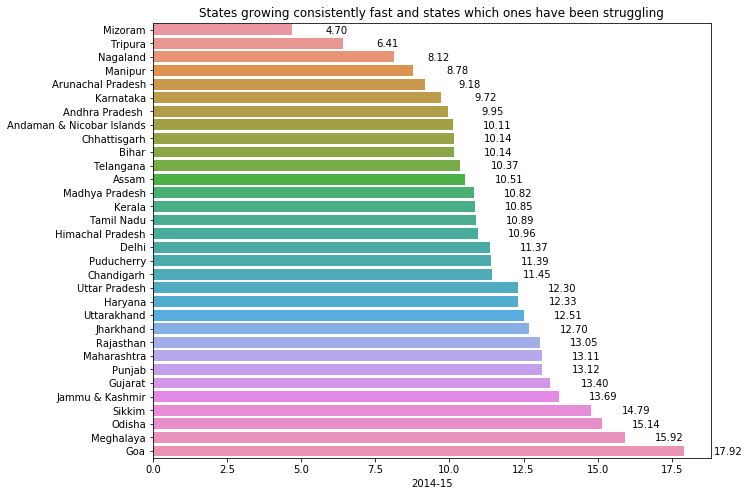

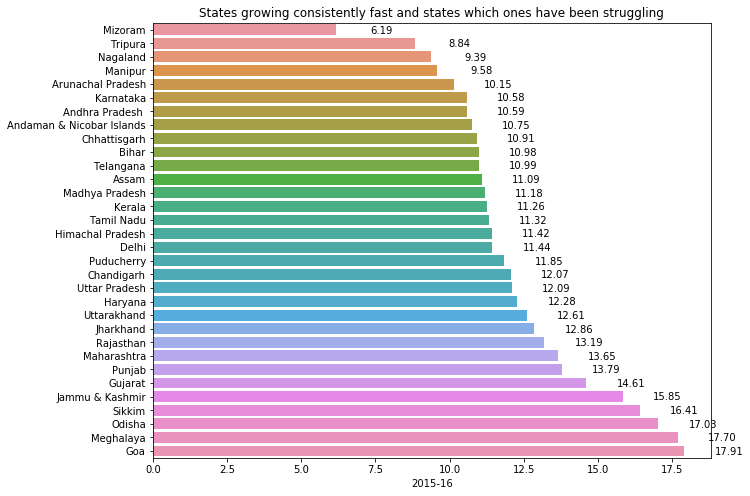

In [14]:
# Plot the Second graph showing states growing consistently fast and states which ones have been struggling?
df.sort_index(axis=1)
val1 = df['2013-14'].sort_values()
val2 = df['2014-15'].sort_values()
val3 = df['2015-16'].sort_values()
val = [val1,val2,val3]
for i in val:
        plt.figure(figsize=(10,8))
        plt.title("States growing consistently fast and states which ones have been struggling")
        ax1 = sns.barplot(data=df,y=df.index,x=i)
        for p in ax1.patches:
            width = p.get_width()
            plt.text(1.5+p.get_width(), p.get_y()+0.55*p.get_height(),
                     '{:1.2f}'.format(width),
                     ha='center', va='center')
        plt.show()


####  Plot the third graph showing states growing consistently fast and states which ones have been struggling for 2015/2016.

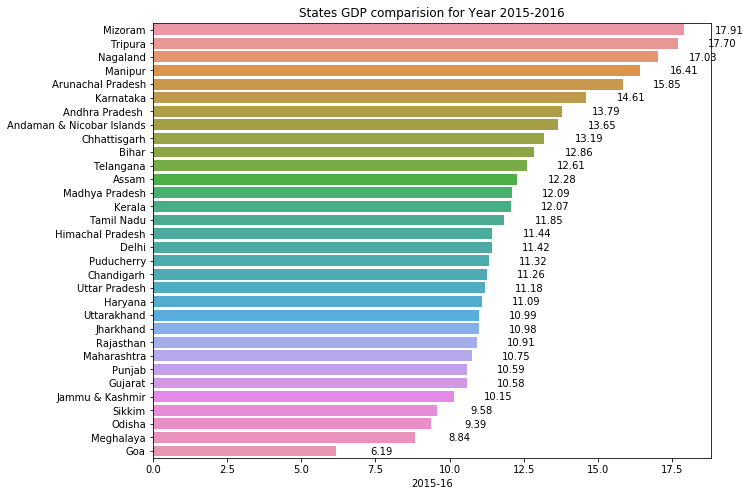

In [15]:
# Plot the third graph showing states growing consistently fast and states which ones have been struggling?
df.sort_index(axis=1)
val3 = df['2015-16'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title("States GDP comparision for Year 2015-2016")
ax1 = sns.barplot(data=df,y=df.index,x=val3)
for p in ax1.patches:
    width = p.get_width()
    plt.text(1.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

In [16]:
# States to consider for the analysis
states = ['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu', 'Telangana', 'Tripura',
       'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']

#### Reading all the files under the folder for all the states.

In [17]:
import os, fnmatch

# Defining an empty dataframe. Will add the data of individual state to this dataframe. 
# GSVA = Gross State Value Added
df1 = pd.DataFrame()
# List of files where GSDP files are present
path=(r'E:\')
listOfFiles = os.listdir(path)  


for filename in listOfFiles:  
    for statename in states:
        if statename in filename:
            filepath = path+filename
            # use the following encoding "ISO-8859-1" otherwise it may create problem reading data for some states
            data_ = pd.read_csv(filepath, encoding = "ISO-8859-1")
            # select only the following columns, Items and year
            data_= data_[['Item', '2014-15']]
            # Take the transpose of the data before adding it to the dataframe
            data_ = data_.T
            header=data_.iloc[0]
            data_=data_[1:]
            data_.columns=header
            # Add data to the dataframe with their respective name of state. 
            # Careful with state having length of 2. Using space bewteen the words of a state as standard as it appears
            # in this format in the dataframe of Part I-A. 
            if statename=='Uttar_Pradesh':
                data_['state'] = 'Uttar Pradesh'
            elif statename=='Madhya_Pradesh':
                data_['state'] = 'Madhya Pradesh'
            elif statename=='Andhra_Pradesh':
                data_['state'] = 'Andhra Pradesh'   
            elif statename=='Arunachal_Pradesh':
                data_['state'] = 'Arunachal Pradesh'   
            elif statename=='Tamil_Nadu':
                data_['state'] = 'Tamil Nadu'   
            else:      
                data_['state'] = statename
            df1 = pd.concat([data_,df1])

In [18]:
df1.set_index('state', inplace=True)

#### Handling missing values

In [19]:
round(100*(df1.isnull().sum()/len(df1)),2)

Agriculture, forestry and fishing                                        0.00
Crops                                                                    0.00
Livestock                                                                0.00
Forestry and logging                                                     0.00
Fishing and aquaculture                                                  0.00
Mining and quarrying                                                     3.70
Primary                                                                  0.00
Manufacturing                                                            0.00
Electricity, gas, water supply & other utility services                  0.00
Construction                                                             0.00
Secondary                                                                0.00
Trade, repair, hotels and restaurants                                    0.00
Trade & repair services                                         

In [20]:
df1 = df1.loc[:, df1.isnull().mean() < .5]
cols = list(df1.columns[df1.isnull().any()])
for i in cols:
    df1 = df1[pd.notnull(df1[i])]

In [21]:
round(100*(df1.isnull().sum()/len(df1)),2)

Agriculture, forestry and fishing                                       0.0
Crops                                                                   0.0
Livestock                                                               0.0
Forestry and logging                                                    0.0
Fishing and aquaculture                                                 0.0
Mining and quarrying                                                    0.0
Primary                                                                 0.0
Manufacturing                                                           0.0
Electricity, gas, water supply & other utility services                 0.0
Construction                                                            0.0
Secondary                                                               0.0
Trade, repair, hotels and restaurants                                   0.0
Trade & repair services                                                 0.0
Hotels & res

In [22]:
df1.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
state,,,,,,,,,,,,,,,,,,,,,
Uttar Pradesh,25097754,16215212,7096876,1404936,380730,901501,25999255,12261649,2030625,11256450,...,14548185,6152124,5034623,45968959,97516938,10107396,3287219,104337115,2109940,49450
Telangana,7591501,4162493,2951299,210741,266968,1541853,9133354,6353711,716266,2854024,...,9478839,1711265,4158229,28471410,47528765,4425700,836700,51117765,367660,139035
Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,82058,...,75330,119514,149265,483103,1467133,72200,18400,1520933,6330,240274
Rajasthan,15044394,7673441,5356257,1956660,58036,4069385,19113780,6552580,1122888,5353326,...,6451997,2460364,4164287,26015812,58158386,5394503,2333442,61219447,721610,84837
Punjab,9285716,5690972,2638842,848245,107657,10354,9296070,4790341,911611,2202962,...,3142786,1842730,3303041,16717805,33918789,3794100,911800,36801089,290673,126606


#### Identify the top-5 and the bottom-5 states based on GDP per capita.

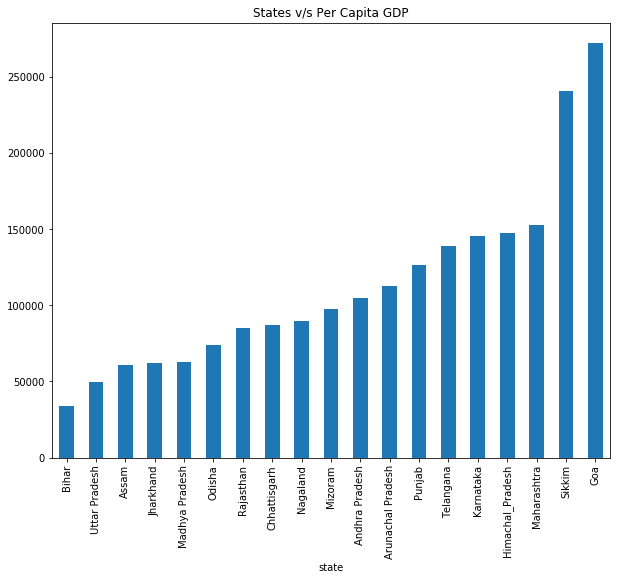

In [23]:
per_capita = df1['Per Capita GSDP (Rs.)'].sort_values()
plt.figure(figsize=(10,8))
plt.title("States v/s Per Capita GDP")
per_capita.plot.bar()
plt.show()

Identify the top-5 and the bottom-5 states based on GDP per capita.
 - Top-5 states: Goa, Sikkim, Maharastra, Himachal Pradesh and Karnataka.
 - Bottom-5 states: Bihar, Uttar Pradesh, Assam, Jharkhand, Madhya Pradesh

### Find the ratio of highest per capita GDP to the lowest per capita GDP.

In [24]:
round(per_capita['Goa']/per_capita['Bihar'],2)

8.0

In [25]:
df1['Primary_percent'] = 100*(df1['Primary']/df1['Gross State Domestic Product'])
df1['Seocndary_percent'] = 100*(df1['Secondary']/df1['Gross State Domestic Product'])
df1['Tertiary_percent'] = 100*(df1['Tertiary']/df1['Gross State Domestic Product'])

In [26]:
df1.head()

,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary_percent,Seocndary_percent,Tertiary_percent
state,,,,,,,,,,,,,,,,,,,,,
Uttar Pradesh,25097754,16215212,7096876,1404936,380730,901501,25999255,12261649,2030625,11256450,...,45968959,97516938,10107396,3287219,104337115,2109940,49450,24.9185,24.4867,44.0581
Telangana,7591501,4162493,2951299,210741,266968,1541853,9133354,6353711,716266,2854024,...,28471410,47528765,4425700,836700,51117765,367660,139035,17.8673,19.414,55.6977
Sikkim,137447,114976,17338,4529,604,1329,138776,550697,212499,82058,...,483103,1467133,72200,18400,1520933,6330,240274,9.1244,55.5746,31.7636
Rajasthan,15044394,7673441,5356257,1956660,58036,4069385,19113780,6552580,1122888,5353326,...,26015812,58158386,5394503,2333442,61219447,721610,84837,31.2217,21.2821,42.496
Punjab,9285716,5690972,2638842,848245,107657,10354,9296070,4790341,911611,2202962,...,16717805,33918789,3794100,911800,36801089,290673,126606,25.2603,21.4801,45.4275


#### Contribution of Primary/Secondary/Tertiary sectors or all states.

<Figure size 1440x576 with 0 Axes>

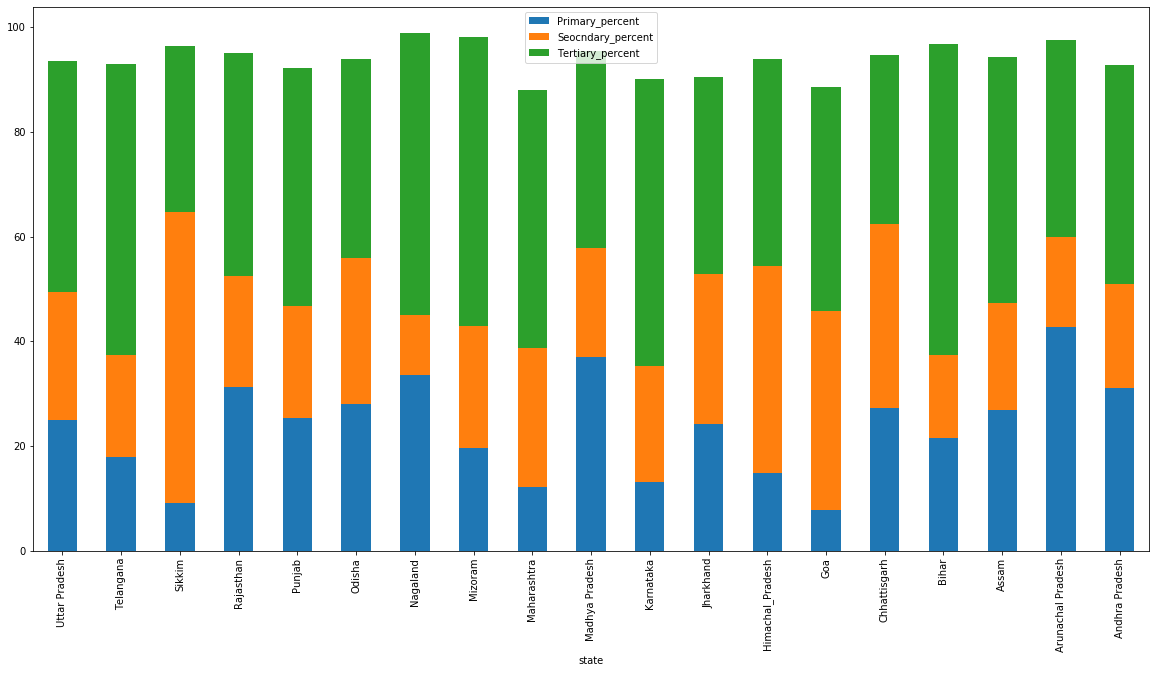

In [27]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,10]
plt.figure(figsize=(20,8))
df1[['Primary_percent', 'Seocndary_percent', 'Tertiary_percent']].plot(kind='bar', stacked=True)
plt.show()

In [28]:
#Below code give the percentile values for 20/50/85/100
per_25 = np.percentile(df1['Per Capita GSDP (Rs.)'],20)
per_50 = np.percentile(df1['Per Capita GSDP (Rs.)'],50)
per_85 = np.percentile(df1['Per Capita GSDP (Rs.)'],85)
per_100 = np.percentile(df1['Per Capita GSDP (Rs.)'],100)

In [29]:
df1['Category'] = 'C'
def def_nondef(x):
    if x <= per_25:
        return "C4"
    elif ((x > per_25) and (x <= per_50)):
        return "C3"
    elif ((x > per_50) and (x <= per_85)):
        return "C2"
    elif x > per_85:
        return "C1"
df1['Category'] = df1['Per Capita GSDP (Rs.)'].apply(lambda x: def_nondef(x))

In [30]:
# Excluding categories like GSDP,GSVP, primary, secondary and tertiary as represent aggregate and here we are trying to
# find the dependence on each of the sub-categories
categories_columns = ['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing',
                      'Electricity, gas, water supply & other utility services', 'Construction',
                      'Trade, repair, hotels and restaurants',
                      'Transport, storage, communication & services related to broadcasting', 
                      'Financial services', 'Real estate, ownership of dwelling & professional services',
                      'Public administration', 'Other services', 'Taxes on Products', 'Subsidies on products']

In [31]:
category1 = []
category2 = []
category3 = []
category4 = []
dfx1 = (df1.loc[(df1.Category == 'C1')])
dfx2 = (df1.loc[(df1.Category == 'C2')])
dfx3 = (df1.loc[(df1.Category == 'C3')])
dfx4 = (df1.loc[(df1.Category == 'C4')])
category1 = list(dfx1.index)
category2 = list(dfx2.index)
category3 = list(dfx3.index)
category4 = list(dfx4.index)
cat = [category1,category2,category3,category4]
for i in cat:
    print(i)

['Sikkim', 'Maharashtra', 'Goa']
['Telangana', 'Punjab', 'Karnataka', 'Himachal_Pradesh', 'Arunachal Pradesh', 'Andhra Pradesh']
['Rajasthan', 'Odisha', 'Nagaland', 'Mizoram', 'Madhya Pradesh', 'Chhattisgarh']
['Uttar Pradesh', 'Jharkhand', 'Bihar', 'Assam']


#### Plotting the States after categorising into C1, C2, C3 and C4 v/s Sub Secotrs Contribution. 

77.0


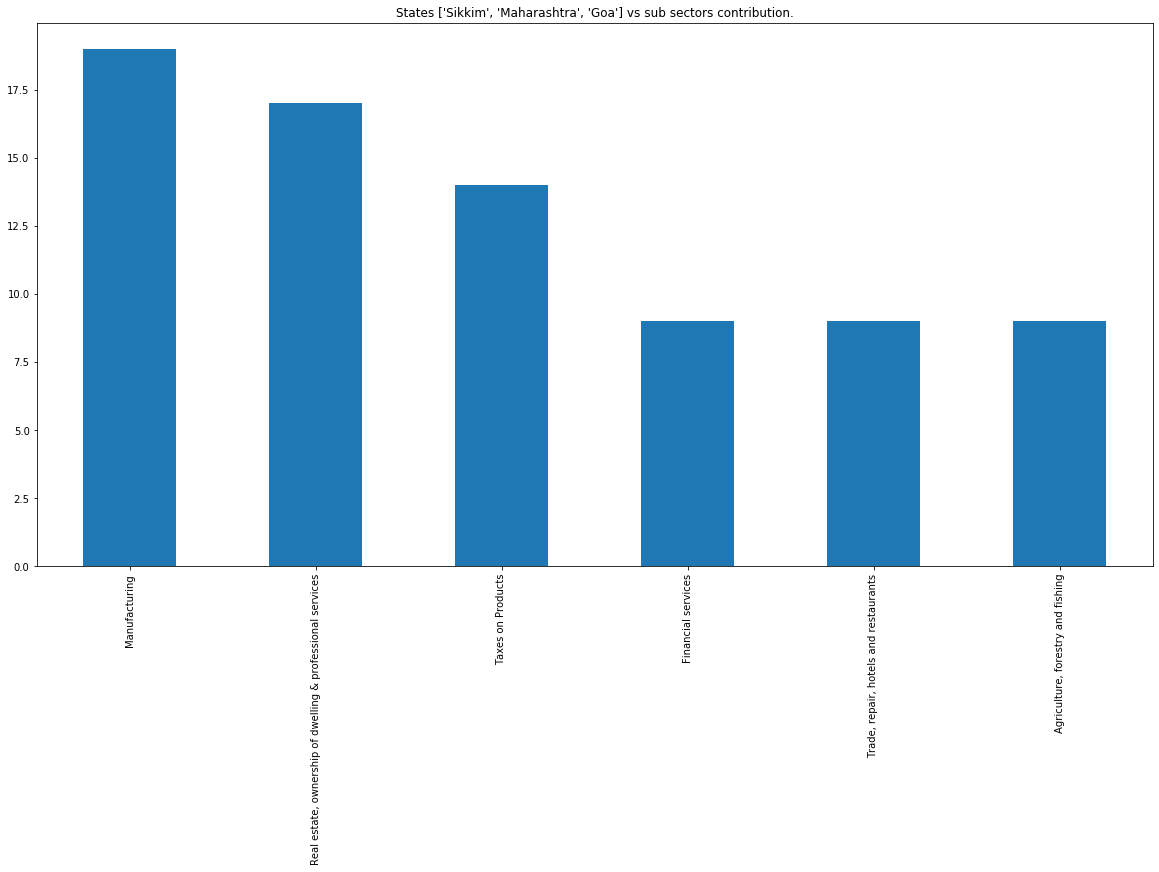

77.0


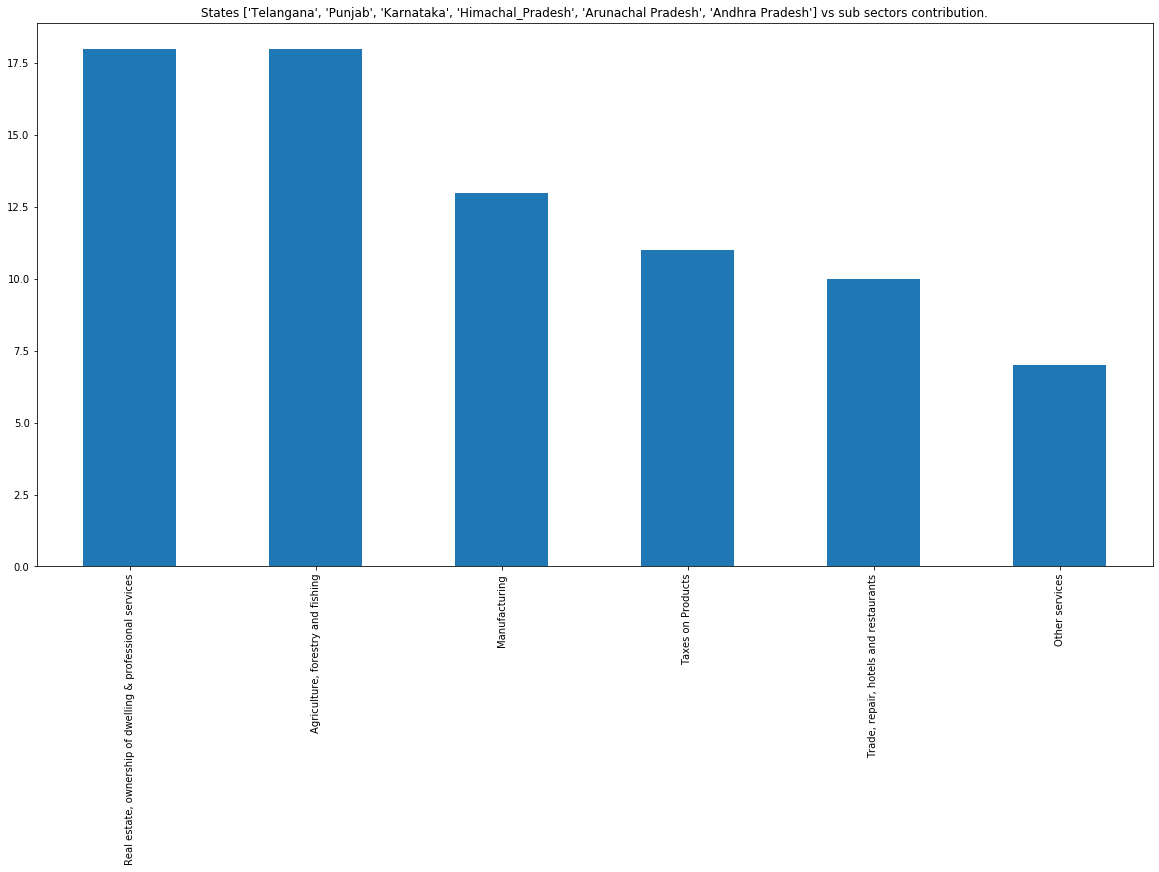

74.0


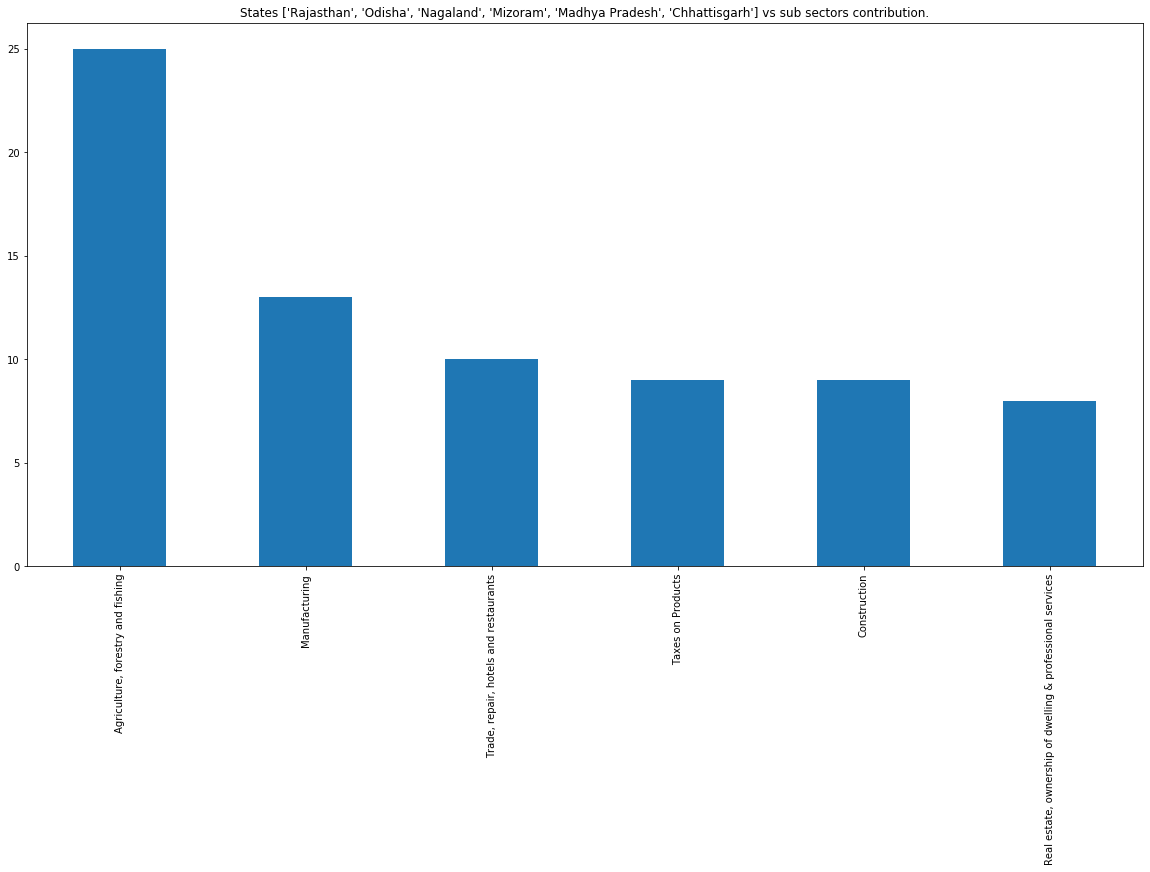

77.0


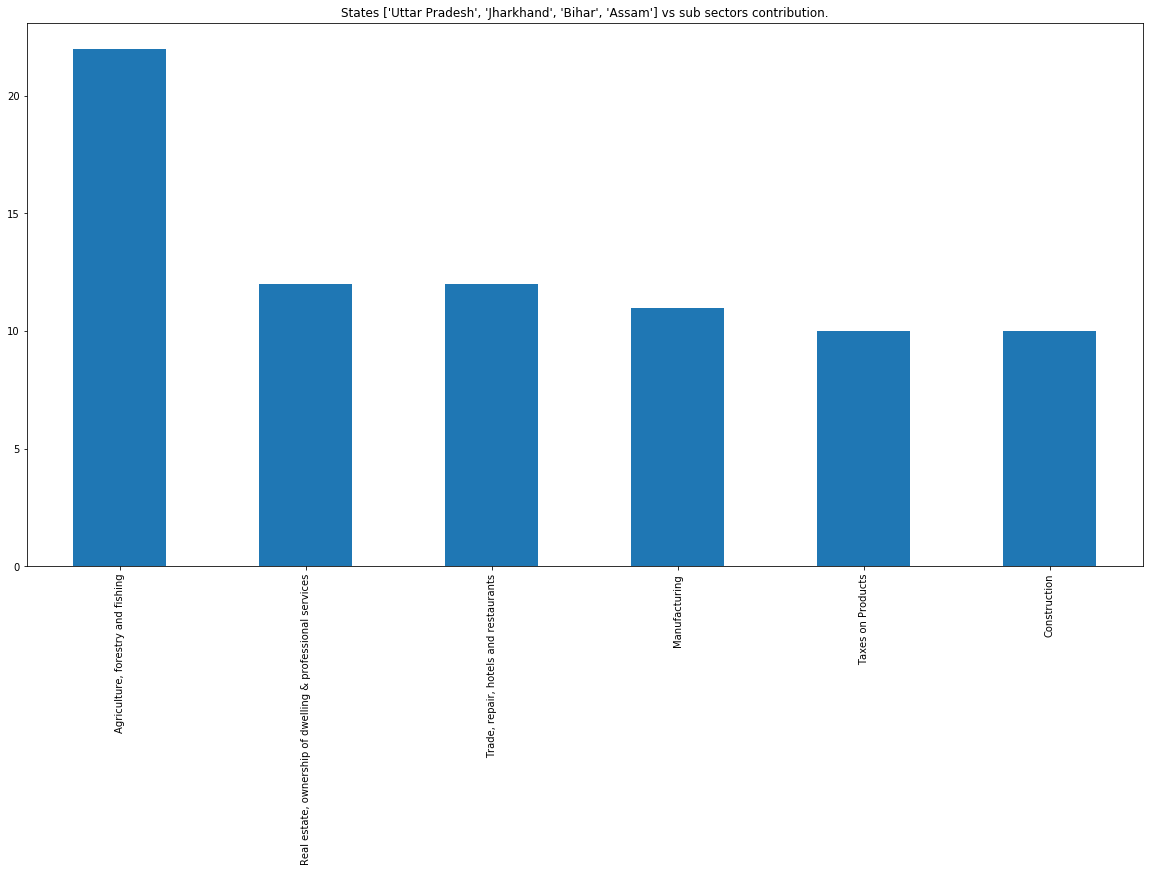

In [32]:
for i in cat:
    agg = df1.loc[i][categories_columns].sum()
    agg_gsdp = df1.loc[i]['Gross State Domestic Product'].sum()
    percentage_contribution = (round(100*(agg/(agg_gsdp))).sort_values(ascending=False)[0:6]).sum()
    print(percentage_contribution)
# # plot
    (round(100*(agg/(agg_gsdp))).sort_values(ascending=False)[0:6]).plot.bar()
    plt.title("States {} vs sub sectors contribution.".format(i))
    plt.show()

### Recommendation on each Category as below to improve Per Capita GDP.

#### Categor-C1: 
 - 1.Facilites for Sectors under Primary & Secondary has to be improved as they are lagging behind currently
 - 2.Hotels and Resturants are not adding any value to the Per Capita GDP. So measure has to be taken to improve this sector under Secodary. 
 
#### Categor-C1: 
 - 1.Facilites for Secondary & Tertiary has to be improved as they are lagging behind currently
 - 2.Hotels and Resturants are not adding any value to the Per Capita GDP. So measure has to be taken to improve this sector under Secodary.
 
#### Categor-C3: 
 - 1.Facilites for Mining and Quarying,Livestocks Sectors under Primary has to be improved as they are lagging behind currently
 - 2.Hotels and Resturants are not adding any value to the Per Capita GDP. So measure has to be taken to improve this sector under Secodary.
 
#### Categor-C4: 
 - 1.Facilites for Sectors under Secondary/Tertiary has to be improved as they are lagging behind currently
 - 2.Hotels and Resturants are not adding any value to the Per Capita GDP. So measure has to be taken to improve this sector under Secodary 